# Fourier Transform (FT) in Image Processing

## Activity 1 Familiarization with Discrete FT

### Circular Aperture

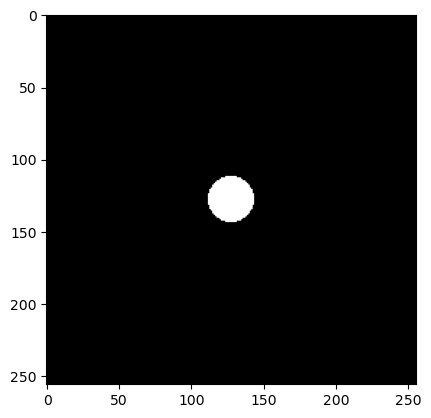

In [1]:
import numpy as np
import matplotlib.pyplot as plt
N = 256 #the higher num is the finer
x = np.linspace(-2,2,num = N)
y = x
X,Y = np.meshgrid(x,y)
R = np.sqrt(X**2 + Y**2)
A = np.zeros(np.shape(R))
A[np.where(R<0.25)] = 1.0
#display as an image
plt.imshow(A, cmap = "gray")

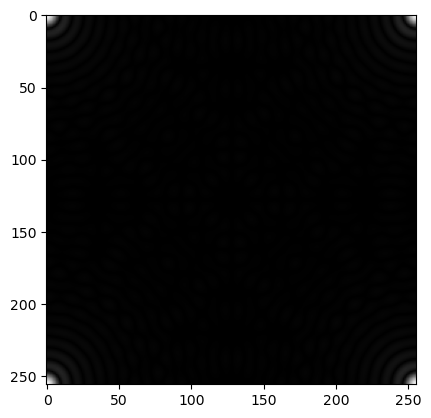

In [2]:
FA = np.fft.fft2(A)
plt.imshow(abs(FA), cmap = 'gray')

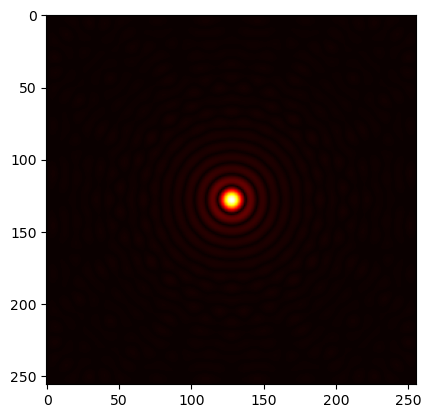

In [3]:
FAshifted = np.fft.fftshift(FA)
plt.imshow((abs(FAshifted)), cmap = 'hot')

### Sine Wave (along x-axis w/ amplitude from -1 to 1)

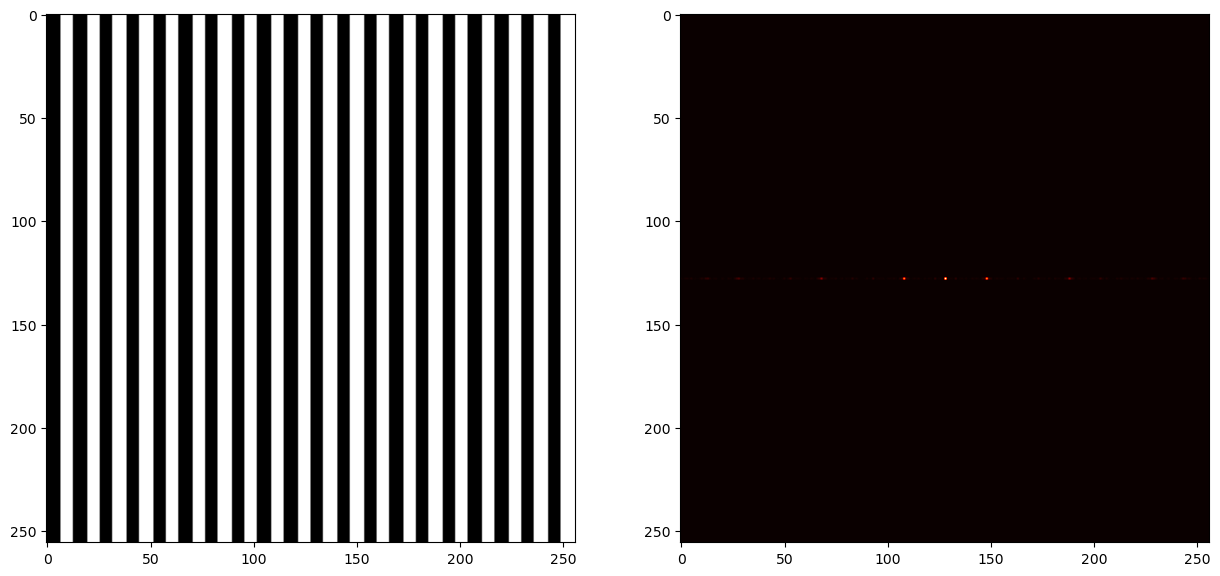

In [4]:
N = 256
Zz = np.zeros((N,N))
for rownum in range (0,len(X)):
    Zz[rownum] = np.sin(5*np.pi*(x - 0.05))**2
    
Ff = np.zeros(np.shape(Zz))
Ff[np.where(Zz>0.5)] = 1.0

FA = np.fft.fft2(Ff)
FAshifted = np.fft.fftshift(FA)

fig, ax = plt.subplots(1,2, figsize = (15,7))
ax[0].imshow(Ff, cmap = "gray")
ax[1].imshow(abs(FAshifted), cmap = 'hot')

### Square Aperture

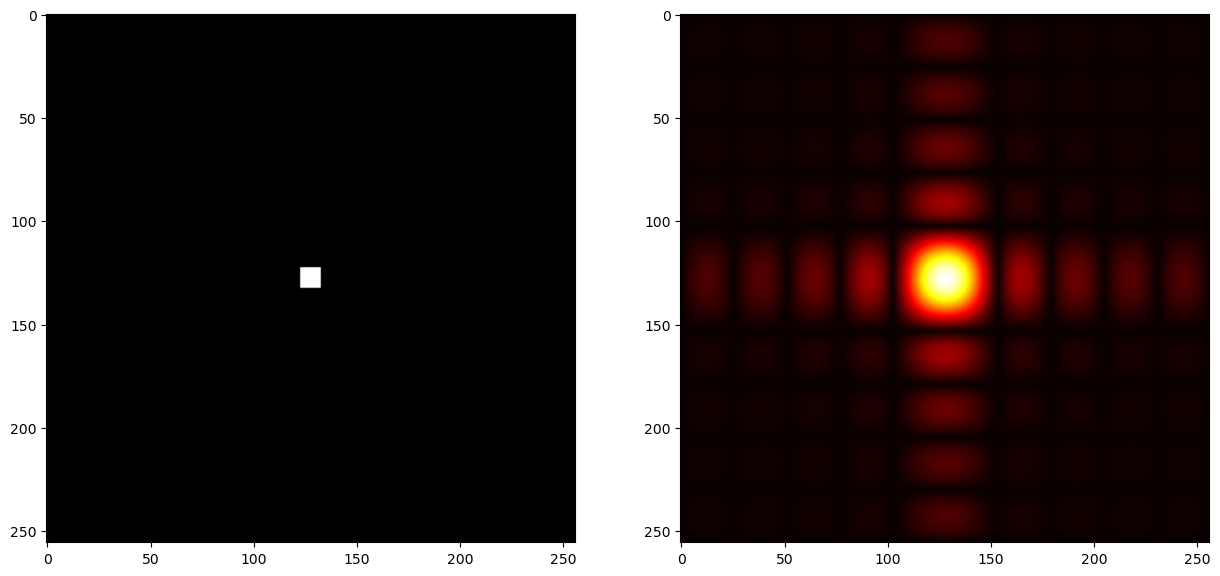

In [5]:
N = 256
B = np.zeros((N,N))
B[int(N/2)-5:int(N/2)+5,int(N/2)-5:int(N/2)+5]=1

FA = np.fft.fft2(B)
FAshifted = np.fft.fftshift(FA)

fig, ax = plt.subplots(1,2, figsize = (15,7))
ax[0].imshow(B, cmap = "gray")
ax[1].imshow(abs(FAshifted), cmap = 'hot')

### Single Slit Aperture

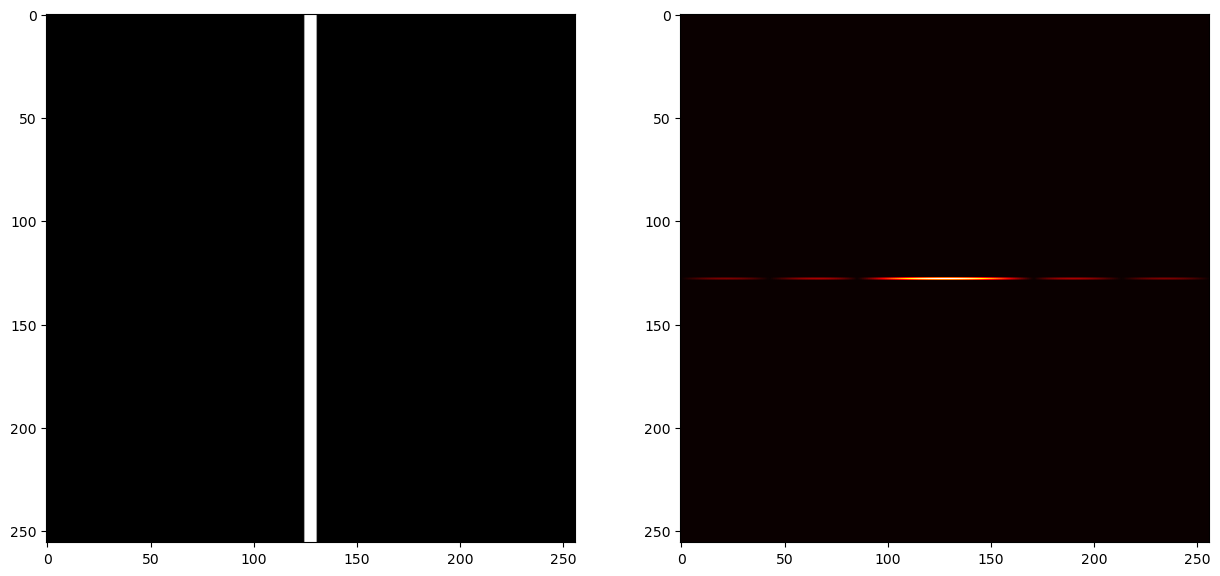

In [6]:
import numpy as np
import matplotlib.pyplot as plt
N = 256 #the higher num is the finer
x = np.linspace(-2,2,num = N)
y = x
X,Y = np.meshgrid(x,y)
A = np.zeros((N,N))
A[np.where(X<0.05)] = 1.0
A[np.where(X<-0.05)] = 0

FA = np.fft.fft2(A)
FAshifted = np.fft.fftshift(FA)

fig, ax = plt.subplots(1,2, figsize = (15,7))
ax[0].imshow(A, cmap = "gray")
ax[1].imshow(abs(FAshifted), cmap = 'hot')

### Double Slit Aperture

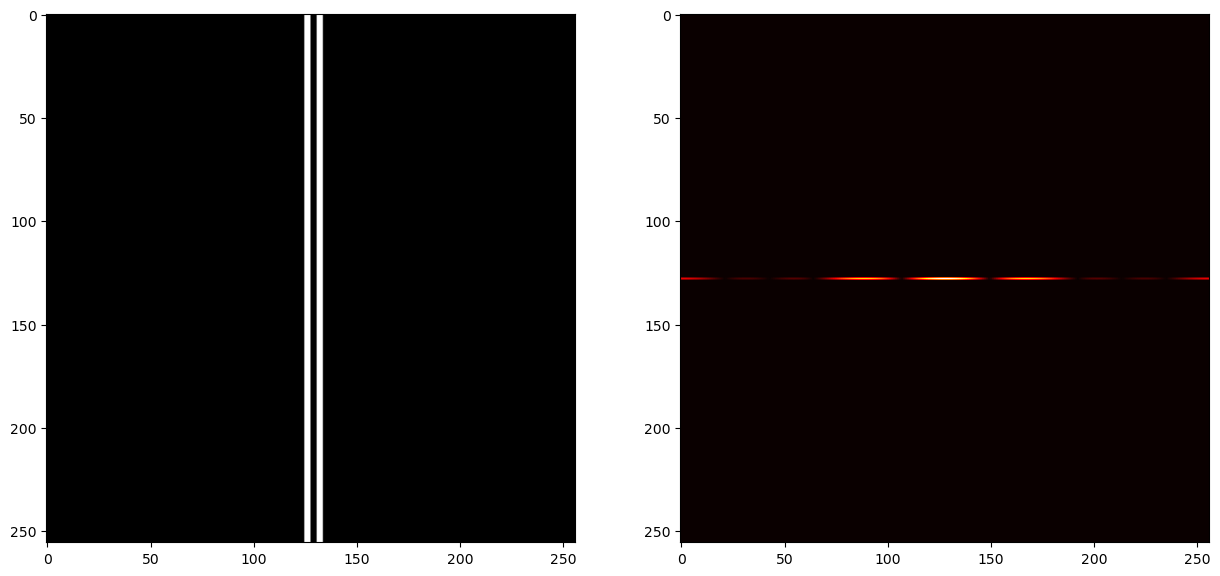

In [7]:
import numpy as np
import matplotlib.pyplot as plt
N = 256 #the higher num is the finer
x = np.linspace(-2,2,num = N)
y = x
X,Y = np.meshgrid(x,y)
A = np.zeros((N,N))

A[np.where(X<0.1)] = 1.0
A[np.where(X<0.05)] = 0
A[np.where(X<0)] = 1
A[np.where(X<-0.05)] = 0

FA = np.fft.fft2(A)
FAshifted = np.fft.fftshift(FA)

fig, ax = plt.subplots(1,2, figsize = (15,7))
ax[0].imshow(A, cmap = "gray")
ax[1].imshow(abs(FAshifted), cmap = 'hot')

 ### Annular Ring Aperture

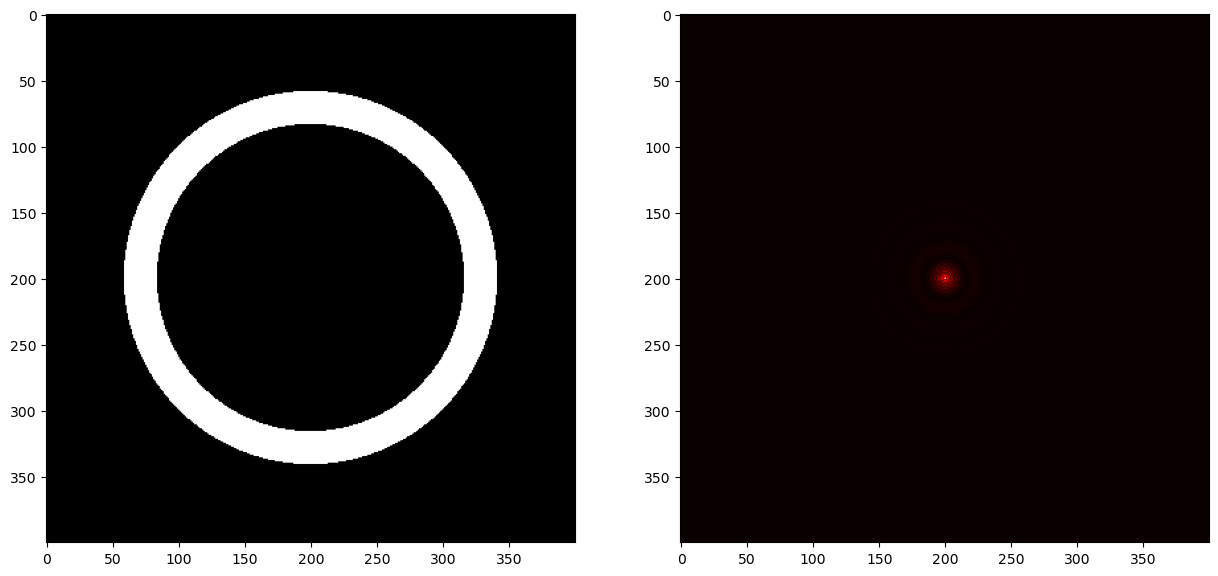

In [8]:
#%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
N = 400 #the higher num is the finer
x = np.linspace(-2,2,num = N)
y = x
X,Y = np.meshgrid(x,y)
R = np.sqrt(X**2 + Y**2)
A = np.zeros(np.shape(R))
A[np.where(R<np.sqrt(2))] = 1.0
A[np.where(R<(np.sqrt(2) - 0.25))] = 0

FA = np.fft.fft2(A)
FAshifted = np.fft.fftshift(FA)

fig, ax = plt.subplots(1,2, figsize = (15,7))
ax[0].imshow(A, cmap = "gray")
ax[1].imshow(abs(FAshifted), cmap = 'hot')

### Circular Aperture w/ Gaussian Transmittance

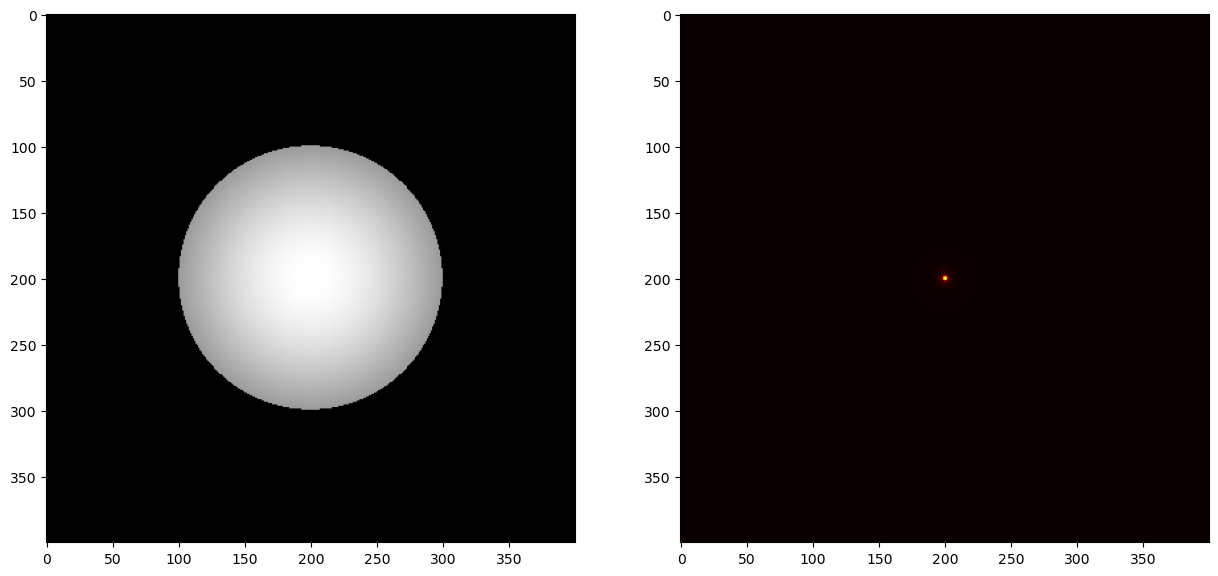

In [9]:
import numpy as np
import matplotlib.pyplot as plt
N = 400 #the higher num is the finer
x = np.linspace(-2,2,num = N)
y = x
X,Y = np.meshgrid(x,y)
circ = np.sqrt(X**2 + Y**2)
R = np.sqrt(1/np.sqrt(2*np.pi))*np.exp(-(X**2 + Y**2)/2)
R[np.where(circ>1)] = 0

FA = np.fft.fft2(R)
FAshifted = np.fft.fftshift(FA)

fig, ax = plt.subplots(1,2, figsize = (15,7))
ax[0].imshow(R, cmap = "gray")
ax[1].imshow(abs(FAshifted), cmap = 'hot')

## Activity 2. Simulation of an imaging system

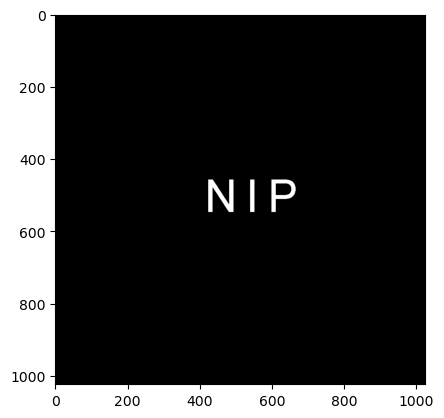

In [10]:
import skimage.io
fname = "./Pictures/NIP.bmp"
nip_img = skimage.io.imread(fname)
plt.imshow(nip_img,cmap = 'gray')

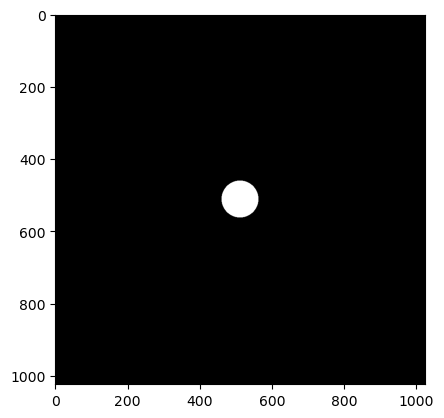

In [11]:
NbyN = np.shape(nip_img)
x = np.linspace(-5,5,num = NbyN[0])
y = x
X,Y = np.meshgrid(x,y)
R = np.sqrt(X**2 + Y**2)
circ = np.zeros(NbyN)
circ[np.where(R<0.5)] = 1
plt.imshow(circ, cmap = 'gray')

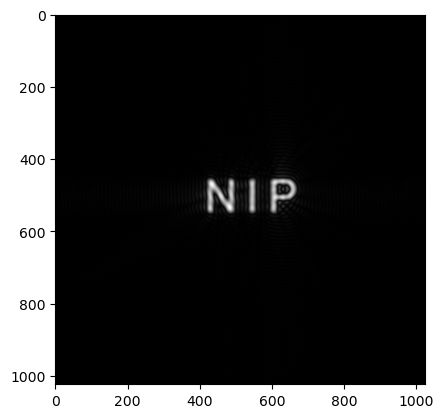

In [12]:
circshift = np.fft.fftshift(circ)
nipfft = np.fft.fft2(nip_img)
convolved = nipfft*circshift
convolvedimg = np.fft.ifft2(convolved)
plt.imshow(abs(convolvedimg), cmap = 'gray') #absolute value needed since fourier transform yields imaginary values

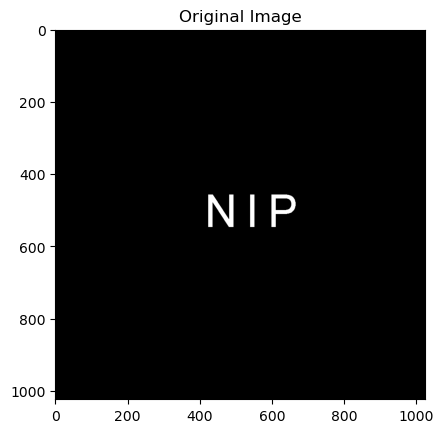

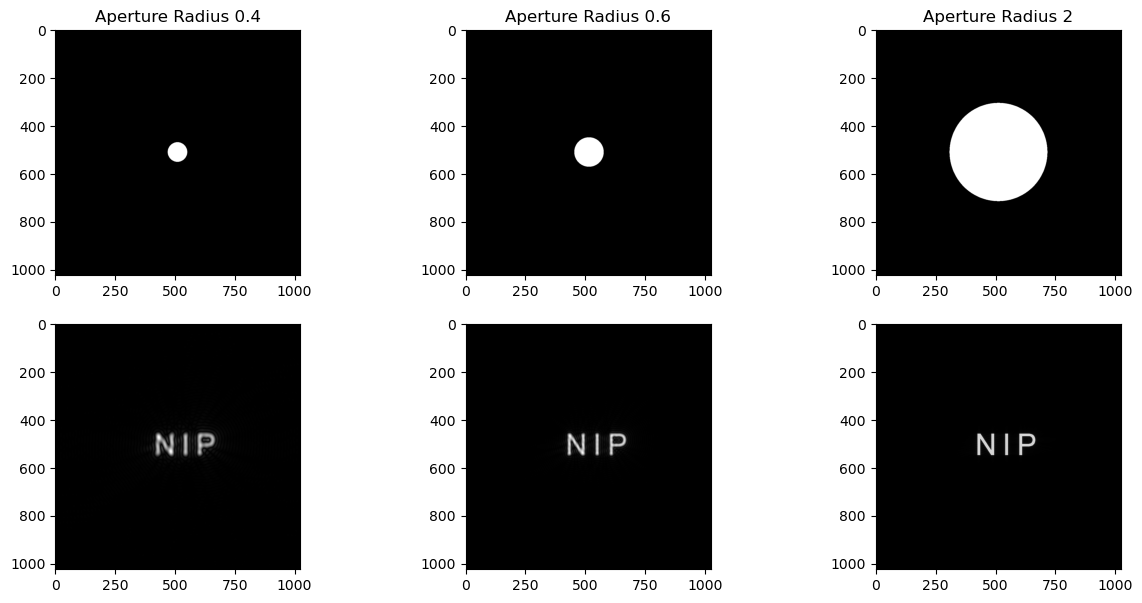

In [13]:
import skimage.io
file = "./Pictures/NIP.bmp"
nip_img = skimage.io.imread(file)

plt.imshow(nip_img,cmap = 'gray')
plt.title("Original Image")

NbyN = np.shape(nip_img)
x = np.linspace(-5,5,num = NbyN[0])
y = x
X,Y = np.meshgrid(x,y)
R = np.sqrt(X**2 + Y**2)
radii = [0.4,0.6,2]
circs = [np.zeros(NbyN) for r in radii]
for i in range(len(circs)):
    circs[i][np.where(R < radii[i])] = 1
    
nipfft = np.fft.fft2(nip_img)
convolved = []
for circ in circs:
    circshift = np.fft.fftshift(circ)
    convolved.append(np.fft.ifft2(nipfft*circshift))

fig, axes = plt.subplots(2,3, figsize = (15,7))
for i in range(3):
    axes[0][i].imshow(circs[i],cmap = 'gray')
    axes[0][i].set_title("Aperture Radius "+ str(radii[i]))
    axes[1][i].imshow(abs(convolved[i]), cmap = 'gray')

When the aperture size is smaller than the original image, the produced image looks blurry. When the aperture size is larger or has a very comparable size to the original image, the produced image becomes indiscernible from the original image.

## Activity 3. Template matching using correlation

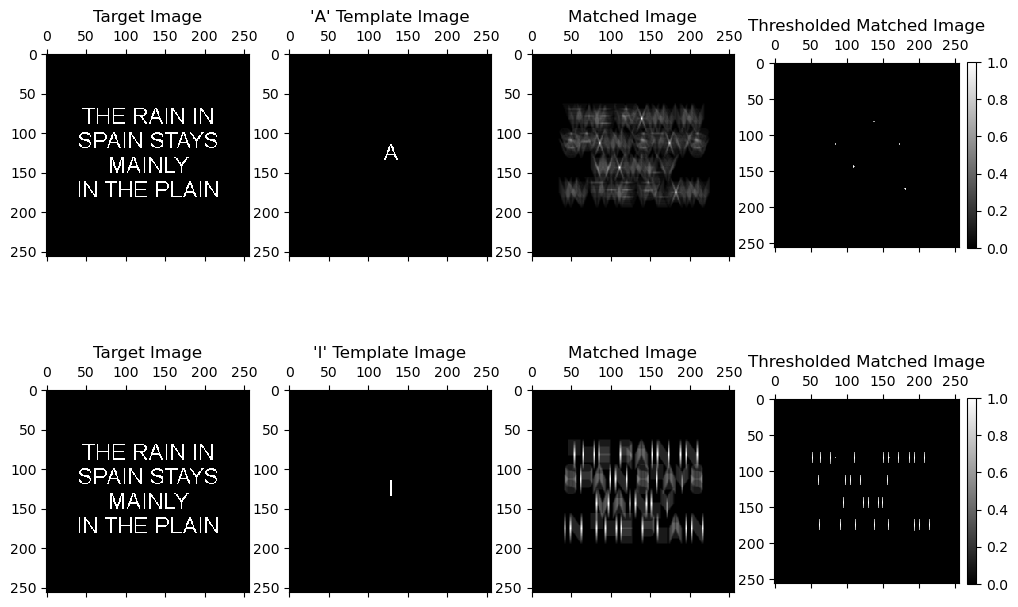

In [14]:
import skimage.io
import matplotlib.pyplot as plt
import numpy as np

targetimg = "./Pictures/Correlation1.png"
templateimg1 = "./Pictures/Correlation2.png"
templateimg2 = "./Pictures/Correlation3.png"

target = skimage.io.imread(targetimg)
template1 = skimage.io.imread(templateimg1)
template2 = skimage.io.imread(templateimg2)

targetfft = np.fft.fft2(target)

templatefft1 = np.fft.fft2(template1)
convolved1 = np.conjugate(templatefft1)*targetfft
templatefft2 = np.fft.fft2(template2)
convolved2 = np.conjugate(templatefft2)*targetfft


mapped1 = np.fft.ifft2(convolved1)
mapped2 = np.fft.ifft2(convolved2)

normmapped1 = np.abs(mapped1/np.max(mapped1))
normmapped1[np.where(normmapped1<0.6)] = 0
normmapped2 = np.abs(mapped2/np.max(mapped2))
normmapped2[np.where(normmapped2<0.6)] = 0

fig, axes = plt.subplots(2,4, figsize = (12,8))
axes[0][0].matshow(target, cmap = 'gray')
axes[0][0].set_title('Target Image')
axes[0][1].matshow(template1, cmap = 'gray')
axes[0][1].set_title('\'A\' Template Image')
axes[0][2].matshow(abs(np.fft.fftshift(mapped1)), cmap = 'gray')
axes[0][2].set_title('Matched Image')
pos = axes[0][3].matshow(np.fft.fftshift(normmapped1), cmap = 'gray')
axes[0][3].set_title('Thresholded Matched Image')
fig.colorbar(pos, ax=axes[0][3], fraction=0.046, pad=0.04)

axes[1][0].matshow(target, cmap = 'gray')
axes[1][0].set_title('Target Image')
axes[1][1].matshow(template2, cmap = 'gray')
axes[1][1].set_title('\'I\' Template Image')
axes[1][2].matshow(abs(np.fft.fftshift(mapped2)), cmap = 'gray')
axes[1][2].set_title('Matched Image')
pos = axes[1][3].matshow(np.fft.fftshift(normmapped2), cmap = 'gray')
axes[1][3].set_title('Thresholded Matched Image')
fig.colorbar(pos, ax=axes[1][3], fraction=0.046, pad=0.04)

plt.show()

The 'A' template has a unique shape and template matching allows to easily count how many letter 'A's are in the image, and where their position is. However, the 'I' template is not unique (given we intentionally chose to pick a sans serif), i.e. the letter 'M' will result in 2 matches, and thus we cannot use template matching to count/locate all the letter 'I's in the image.

## Extra. Removing white lines

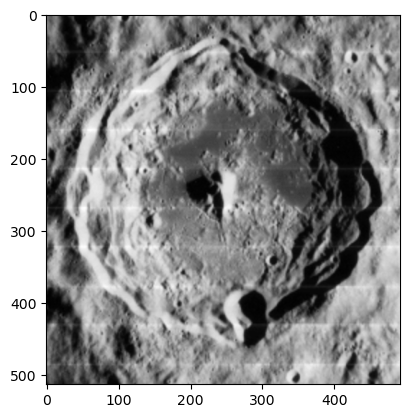

In [15]:
import skimage
import scipy
import numpy as np 
import matplotlib.pyplot as plt
file = "./Pictures/lunar_image.png"
img = skimage.io.imread(file)
fig, ax = plt.subplots()

#ax.imshow(img)

img2gray = skimage.color.rgb2gray(img[:,:,0:3])
img2gray_8bit = skimage.util.img_as_ubyte(img2gray)

ax.imshow(img2gray_8bit, cmap = 'gray')


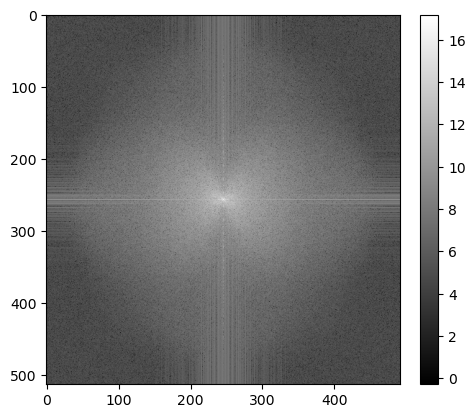

In [16]:
FA = np.fft.fft2(img2gray_8bit)
Fshift = np.fft.fftshift(FA)
#we use log because values are large af
pos = plt.imshow(np.log(abs(Fshift)), cmap='gray')
plt.colorbar(pos, fraction=0.046, pad=0.04)

We try a circular mask (not useful, but a teaching moment):

C:\Users\johns\AppData\Local\Temp\ipykernel_16372\3875556226.py:9: RuntimeWarning: divide by zero encountered in log
  plt.matshow(np.log(np.abs(filtered_fft1)), cmap ='gray')


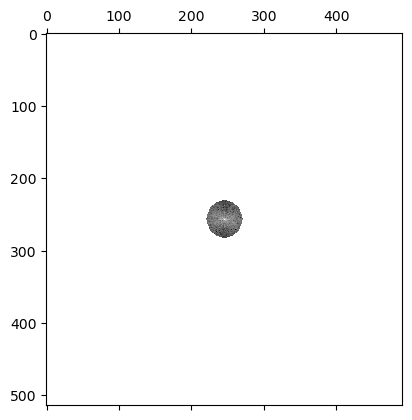

In [18]:
center = np.array(img2gray_8bit.shape)/2
xdim,ydim = img2gray_8bit.shape[1], img2gray_8bit.shape[0]
x,y = np.linspace(-1,1,xdim),np.linspace(-1,1,ydim)
X,Y = np.meshgrid(x,y)
R = np.sqrt(X**2 + Y**2)

filterr = R < 0.1
filtered_fft1 = filterr*Fshift
plt.matshow(np.log(np.abs(filtered_fft1)), cmap ='gray')

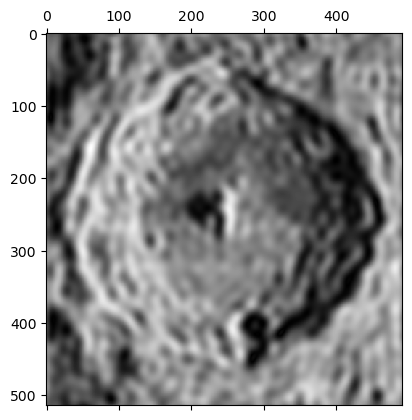

In [19]:
filtered_image1 = np.fft.ifft2(filtered_fft1)
plt.matshow(np.abs(filtered_image1), cmap='gray')

Recall that when objects undergo fourier transform, they are rotated in $k$-space (kind of a 90 degree angle rotation). Hence, since the white lines are horizontal and parallel, we want to mask a slit at the center. However, we don't want to remove the center itself since this contains most of the information (things with low frequencies/don't repeat often will have small amplitudes, i.e. most of the image itself is not repetitive and so we don't want to erase the center).

C:\Users\johns\AppData\Local\Temp\ipykernel_16372\130725433.py:9: RuntimeWarning: divide by zero encountered in log
  plt.matshow(np.log(np.abs(filtered_fft2)))


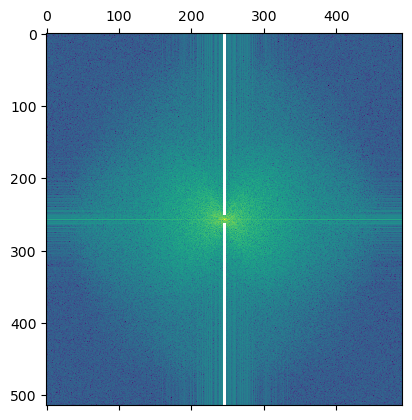

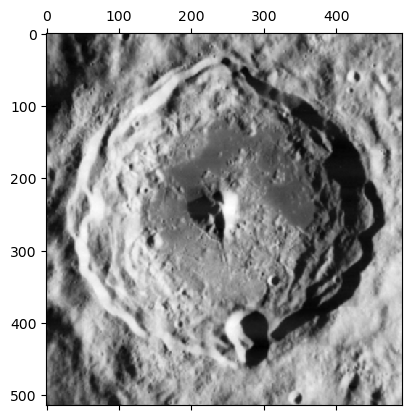

In [20]:
middlecol = int(np.shape(Fshift)[1]/2)
middlerow = int(np.shape(Fshift)[0]/2)
mask = np.zeros(np.shape(Fshift))
mask[: ,middlecol+2:] = 1
mask[:,:middlecol-2] = 1
mask[middlerow-5:middlerow+5,middlecol-2:middlecol+2] = 1

filtered_fft2 = mask*Fshift
plt.matshow(np.log(np.abs(filtered_fft2)))
filtered_image2 = np.fft.ifft2(filtered_fft2)
plt.matshow(np.abs(filtered_image2), cmap='gray')